 # Predicting Diabetes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.mean()

male                 0.0
age                 49.0
education            2.0
currentSmoker        0.0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         0.0
diabetes             0.0
totChol            234.0
sysBP              128.0
diaBP               82.0
BMI                 25.4
heartRate           75.0
glucose             78.0
TenYearCHD           0.0
dtype: float64

In [4]:
# To replce the null values with the column mean values, to have a wide dataset
df = df.fillna(df.mean())
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


 ## Separate the Features (X) from the Target (y)

In [5]:
y = df["TenYearCHD"]
X = df.drop(columns="TenYearCHD")

 ## Split our data into training and testing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(3178, 15)

 ## Create a Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=3400,
                                random_state=1)

 ## Fit (train) or model using the training data

In [8]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=3400, random_state=0)

 ## Make predictions

In [9]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,1
6,0,0
7,0,0
8,0,1
9,0,1


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8509433962264151


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[892   7]
 [151  10]]


In [18]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       899
           1       0.59      0.06      0.11       161

    accuracy                           0.85      1060
   macro avg       0.72      0.53      0.52      1060
weighted avg       0.81      0.85      0.80      1060



In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8481132075471698

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

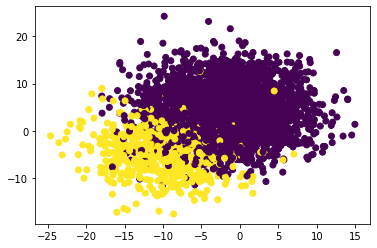

In [29]:
# Generate imbalanced dataset
X, y = make_blobs(n_samples=[3000, 600], random_state=1, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [16]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, classification_report
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[894   5]
 [157   4]]


Accuracy of Logistic Regression: 84.71698113207547 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       899
           1       0.44      0.02      0.05       161

    accuracy                           0.85      1060
   macro avg       0.65      0.51      0.48      1060
weighted avg       0.79      0.85      0.78      1060



/Users/amberbethel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
